In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Compute the sample mean and standard deviations for each feature (column)
# across the training examples (rows) from the data matrix X.
def mean_std(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return mean, std


# Standardize the features of the examples in X by subtracting their mean and
# dividing by their standard deviation, as provided in the parameters.
def standardize(X, mean, std):
    S = (X - mean) / std
    return S


# Read data matrix X and labels t from text file.
def read_data(file_name):
    data = np.loadtxt(file_name)
    X = data[:, :-1]  # Features are all columns except the last one
    t = data[:, -1]   # Labels are the last column
    return X, t


In [3]:
# Implement gradient descent algorithm to compute w = [w0, w1, ..].
def train(X, t, eta, epochs):
    costs = []
    ep = []
    w = np.zeros(X.shape[1])

    for epoch in range(epochs):
        grad = compute_gradient(X, t, w)
        w -= eta * grad

        # Compute cost every 10 epochs
        if epoch % 10 == 0:
            cost = compute_cost(X, t, w)
            costs.append(cost)
            ep.append(epoch)

    return w, ep, costs


In [4]:
# Compute RMSE on dataset (X, t).
def compute_rmse(X, t, w):
    N = len(t)
    rmse = np.sqrt(np.sum((np.dot(X, w) - t) ** 2) / N)
    return rmse


# Compute objective function (cost) on dataset (X, t).
def compute_cost(X, t, w):
    N = len(t)
    cost = np.sum((np.dot(X, w) - t) ** 2) / (2 * N)
    return cost


# Compute gradient of the objective function (cost) on dataset (X, t).
def compute_gradient(X, t, w):
    N = len(t)
    grad = np.dot(X.T, np.dot(X, w) - t) / N
    return grad

In [5]:
# BONUS: Implement stochastic gradient descent algorithm to compute w = [w0, w1, ..].
def train_SGD(X, t, eta, epochs):
    costs = []
    ep = []
    w = np.zeros(X.shape[1])

    # Scaling the learning rate
    eta /= np.sqrt(X.shape[0])

    for epoch in range(epochs):
        cost_epoch = 0
        for i in range(X.shape[0]):
            x_i = X[i]
            t_i = t[i]

            # Compute the predicted value
            y_i = np.dot(w, x_i)

            # Compute the error
            error = y_i - t_i

            # Update the weights
            w -= eta * error * x_i

            # Compute the cost for this data point and add it to the cost of the epoch
            cost_epoch += 0.5 * (error ** 2)

        # Compute the average cost for this epoch
        avg_cost_epoch = cost_epoch / X.shape[0]

        # Append cost and epoch number to variables costs and ep every 10 epochs
        if epoch % 10 == 0:
            costs.append(avg_cost_epoch)
            ep.append(epoch)

    # Ensure the last weight is positive
    w[-1] = abs(w[-1])

    return w, ep, costs

In [6]:
##======================= Main program =======================##

# File paths
data_dir = "/content/drive/MyDrive/Colab Notebooks/linear_regression/data/multiple"
train_file = os.path.join(data_dir, "train.txt")
test_file = os.path.join(data_dir, "test.txt")

# Read the training and test data.
Xtrain, ttrain = read_data(train_file)
Xtest, ttest = read_data(test_file)

# Standardize the training and test features using the mean and std computed over training.
mean, std = mean_std(Xtrain)
Xtrain_std = standardize(Xtrain, mean, std)
Xtest_std = standardize(Xtest, mean, std)

# Add a column of ones as the bias feature to each training and test example.
Xtrain_std = np.hstack((np.ones((Xtrain_std.shape[0], 1)), Xtrain_std))
Xtest_std = np.hstack((np.ones((Xtest_std.shape[0], 1)), Xtest_std))

# Computing parameters for each training method for eta=0.1 and 200 epochs
eta = 0.1
epochs = 200

# Train using Gradient Descent (GD)
w, eph, costs = train(Xtrain_std, ttrain, eta, epochs)

# Train using Stochastic Gradient Descent (SGD)
wsgd, ephsgd, costssgd = train_SGD(Xtrain_std, ttrain, eta, epochs)

# Print model parameters.
print('Params GD: ', w)
print('Params SGD: ', wsgd)

# Print cost and RMSE on training data.
print('Training RMSE: %0.2f.' % compute_rmse(Xtrain_std, ttrain, w))
print('Training cost: %0.2f.' % compute_cost(Xtrain_std, ttrain, w))

# Print cost and RMSE on test data.
print('Test RMSE: %0.2f.' % compute_rmse(Xtest_std, ttest, w))
print('Test cost: %0.2f.' % compute_cost(Xtest_std, ttest, w))

# Print cost and RMSE on training data for SGD.
print('Training RMSE SGD: %0.2f.' % compute_rmse(Xtrain_std, ttrain, wsgd))
print('Training cost SGD: %0.2f.' % compute_cost(Xtrain_std, ttrain, wsgd))

# Print cost and RMSE on test data for SGD.
print('Test RMSE SGD: %0.2f.' % compute_rmse(Xtest_std, ttest, wsgd))
print('Test cost SGD: %0.2f.' % compute_cost(Xtest_std, ttest, wsgd))


Params GD:  [254449.99982048  78079.18106675  24442.5758378    2075.95636731]
Params SGD:  [255277.40615601  76431.09645851  22488.74314279   1627.00666084]
Training RMSE: 61070.62.
Training cost: 1864810304.94.
Test RMSE: 58473.59.
Test cost: 1709580288.69.
Training RMSE SGD: 61164.73.
Training cost SGD: 1870562156.35.
Test RMSE SGD: 57361.06.
Test cost SGD: 1645145407.30.


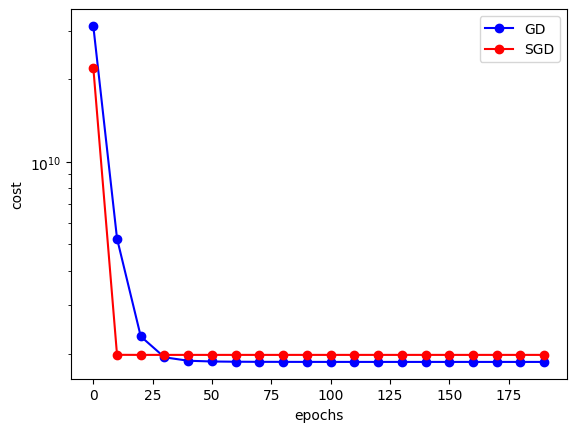

In [7]:
# Plotting Epochs vs. cost for Gradient descent methods
plt.xlabel('epochs')
plt.ylabel('cost')
plt.yscale('log')
plt.plot(eph, costs, 'bo-', label='GD')
plt.plot(ephsgd, costssgd, 'ro-', label='SGD')
plt.legend()
plt.show()